In [2]:
!pip install pymysql

In [7]:
!pip install openpyxl


  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8920 sha256=eb66456fef03afc299b0af265424cce80f41d5d7cfba8664d72658773d6e15ba
  Stored in directory: c:\users\shalini\appdata\local\pip\cache\wheels\ef\92\e0\956c00decf3091294b8800d9104f6169a1adacfaafd122ed42
Successfully built et-xmlfile


In [9]:
!pip install mysql-connector-python

In [11]:
!pip install seaborn

### Import All the Packages

In [12]:
import pymysql
import mysql.connector
from mysql.connector import Error
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import datetime
import random
import math
import numpy as np

In [13]:
# connection with the Database provided
cnx = {'host': 'cpanel.insaid.co',
      'username': 'student',
      'password': 'student',
      'db': 'Capstone2'}

# Connect to the database
connection = pymysql.connect(cnx['host'],cnx['username'],cnx['password'],cnx['db'])

# close connection
connection.close()

### Fetch all the table names 

In [14]:
#open connection
cnx = {'host': 'cpanel.insaid.co',
      'username': 'student',
      'password': 'student',
      'db': 'Capstone2'}
connection = pymysql.connect(cnx['host'],cnx['username'],cnx['password'],cnx['db'])
# open cursor
cursor = connection.cursor()
# query
query = "SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE table_schema ='Capstone2'"
# execute query
cursor.execute(query)
# fetch results
result = cursor.fetchall()
# print results
for table in result:
    print (table)
# close connection
connection.close()

('department_data',)
('employee_data',)
('employee_details_data',)
('model_evaluation_results',)
('model_evaluation_table',)


### Now we will fetch the different tables and export the data in CSV format

In [15]:
#open connection
connection = pymysql.connect(cnx['host'],cnx['username'],cnx['password'],cnx['db'])
# open cursor
cursor = connection.cursor()
# query to extract data from department data table
query1 = "Select * from department_data"
# execute query
cursor.execute(query1)
# fetch results
result = cursor.fetchall()
# print results
df1 = pd.read_sql(query1, connection)
#for row in result:
#    print (row)
# close connection
connection.close()

In [16]:
df1.to_csv('department_data.csv')

In [17]:
#open connection
connection = pymysql.connect(cnx['host'],cnx['username'],cnx['password'],cnx['db'])
# open cursor
cursor = connection.cursor()
# query to extract data from employee data table
query2 = "Select * from employee_data"
# execute query
cursor.execute(query2)
# fetch results
result = cursor.fetchall()
# print results
df2 = pd.read_sql(query2, connection)
#for row in result:
#    print (row)
# close connection
connection.close()

In [18]:
df2.to_csv('employee_data.csv')

In [19]:
#open connection
connection = pymysql.connect(cnx['host'],cnx['username'],cnx['password'],cnx['db'])
# open cursor
cursor = connection.cursor()
# query to extract data from the employee details data table
query3 = "Select * from employee_details_data"
# execute query
cursor.execute(query3)
# fetch results
result = cursor.fetchall()
# print results
df3 = pd.read_sql(query3, connection)
#for row in result:
#    print (row)
# close connection
connection.close()

In [20]:
df3.to_csv('employee_details_data.csv')

#### Now we are done exporting our data from Insaid's database into Csv format

### We will now examine the data provided in these 3 tables 

In [21]:
df1

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray
5,D00-FN,Finance,Aanchal J
6,D00-PR,Procurement,Louie Viles
7,D00-AD,Admin,Evelyn Tolson
8,D00-MN,Management,Ellie Trafton
9,D00-MT,Marketing,Reuben Swann


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


In [23]:
df2.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


In [24]:
df2.shape

(14150, 11)

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


#### Now the most important factor which decides if an employee is willing to leave or stay in the same company is : " SALARY PAID".
#### Hence, in order to retain an employee we first need to check :

i.) How "satisfied" is the employee in his /her current job (given the salary he/she is receiving )

ii.) was the employee promoted recently or in the pst 3 years? ( As this factor also counts towards our prediction goal )


In [26]:
df2.isnull().sum() # looking for missing values in our data

avg_monthly_hrs          0
department             707
filed_complaint      12104
last_evaluation       1487
n_projects               0
recently_promoted    13853
salary                   0
satisfaction           150
status                   0
tenure                 150
employee_id              0
dtype: int64

In [27]:
df2['salary'].value_counts()  # checking the number of employess with highest and lowest salary

low       6906
medium    6101
high      1143
Name: salary, dtype: int64

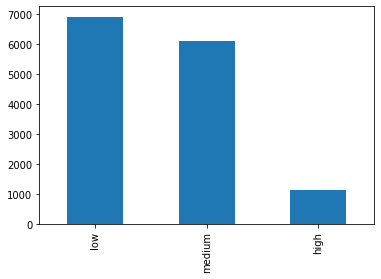

In [28]:
df2['salary'].value_counts().plot.bar() 

#### From the above bar plot we can see that the number of employees with Low Salary package is MAXIMUM , whereas the number of employees with a High salary package is at it's MINIMUM level .

#### Now we will check the satisfaction score of the employees. 

How well satisfied are they in their current job

### Histogram Plot ( to see the satisfaction score of the employees )

C:\Users\Shalini\Downloads\Other_Stuff\envs\NewEnv\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Shalini\Downloads\Other_Stuff\envs\NewEnv\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 351.,  939.,  512.,  920., 1564., 1739., 1833., 2103., 2057.,
        1982.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

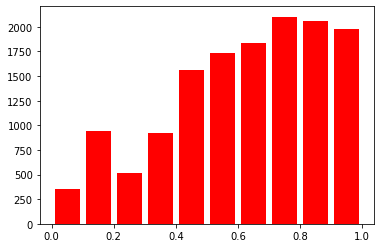

In [29]:
plt.hist(df2['satisfaction'], 10, range = (0,1), color = 'red', histtype = 'bar', rwidth = 0.8)

#### We can see that the Maximum Satisfaction of the employees range in between 0.7 to 0.8 , with most of the employees having an average satisfaction score ( which is again on the good side (for the company)) . 
#### And very close to it are the employees who are HIGHLY satisfied with their current job , satisfaction score ranging between 0.8 to 1.0

### Now we come to our second factor : dealing with the employees who were recently promoted. 

We can see that the the number of missing values for this column recently_promoted is pretty high, almost 13k. 
Hence we will proceed to drop this column later on and not use it further in our analysis.

### Most important column : Target (STATUS ) 

In [30]:
df2['status'].unique()

array(['Left', 'Employed'], dtype=object)

In [32]:
df2['status'].value_counts()   # checking the current status of the employees in the company

Employed    10784
Left         3366
Name: status, dtype: int64

In [33]:
df2['status'] = [0 if x =="Left" else 1 for x in df2['status']]

In [34]:
df2['status'].value_counts()

1    10784
0     3366
Name: status, dtype: int64

In [35]:
df2.drop(["recently_promoted"], axis = 1, inplace = True)   # As analyzed above, we are dropping this COLUMN

In [36]:
df2.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,medium,0.134415,0,4.0,124467
1,134.0,None,NaN,0.555718,2,low,0.511041,0,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,medium,0.405101,0,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,low,0.152974,0,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,medium,0.434845,0,3.0,113707


In [37]:
df2.shape

(14150, 10)

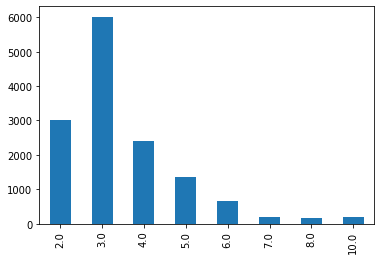

In [38]:
df2['tenure'].value_counts().sort_index().plot.bar()

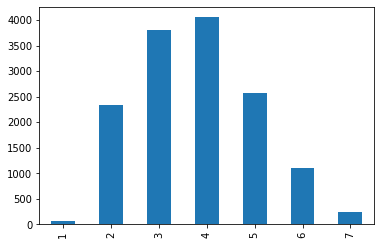

In [39]:
df2['n_projects'].value_counts().sort_index().plot.bar()

#### Now we will check for Outliers if any in our Data

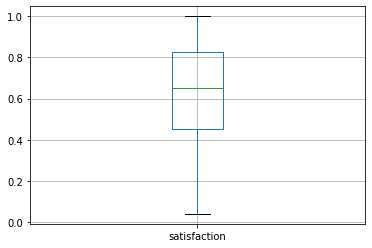

In [42]:
df2.boxplot(column=['satisfaction'])

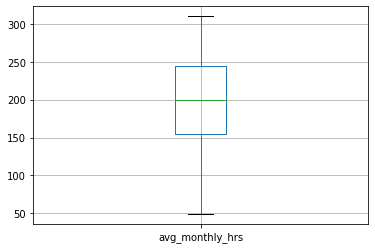

In [43]:
df2.boxplot(column=['avg_monthly_hrs'])

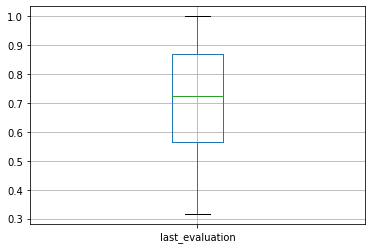

In [44]:
df2.boxplot(column=['last_evaluation'])

### We can conclude that there are no OUTLIERS in our data

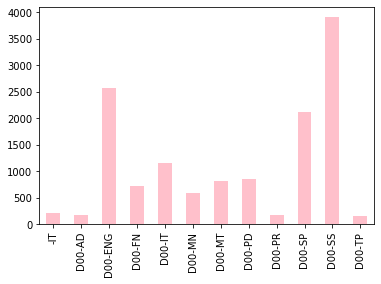

In [45]:
df2['department'].value_counts().sort_index().plot.bar(color='pink')

### Moving onto our 3rd dataframe:

In [46]:
df3.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [47]:
df3.shape

(14245, 4)

### The common attribute between our Employee data table and Employee Details data table is the EMPLOYEE_ID. 

In [48]:
print (df2['employee_id'].nunique())
print (df3['employee_id'].nunique())

14117
14245


#### There are almost 28 extra values for this column


### Two employees cannot have the same Employee_ID, hence we will remove the duplicate 

In [49]:
df2.drop_duplicates(subset='employee_id',keep='first', inplace=True)

#### We will also remove the "Filed_complaint" column as it has got maximum number of missing values

In [51]:
df2.drop(["filed_complaint"], axis = 1, inplace = True)

In [52]:
df2.shape

(14117, 9)

In [53]:
emp_data = pd.merge(df2,df3,on='employee_id',how='inner') #Merging both the datas

In [54]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14115
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   avg_monthly_hrs  14116 non-null  float64
 1   department       13410 non-null  object 
 2   last_evaluation  12629 non-null  float64
 3   n_projects       14116 non-null  int64  
 4   salary           14116 non-null  object 
 5   satisfaction     13966 non-null  float64
 6   status           14116 non-null  int64  
 7   tenure           13966 non-null  float64
 8   employee_id      14116 non-null  int64  
 9   age              14116 non-null  int64  
 10  gender           14116 non-null  object 
 11  marital_status   14116 non-null  object 
dtypes: float64(4), int64(4), object(4)
memory usage: 1.4+ MB


In [55]:
emp_data.shape

(14116, 12)

In [56]:
emp_data['gender'].value_counts()

Male      9287
Female    4829
Name: gender, dtype: int64

In [57]:
male = emp_data[emp_data['gender']=='Male']
female = emp_data[emp_data['gender']=='Female']

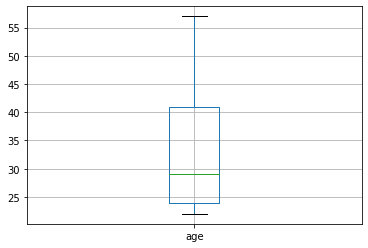

In [58]:
emp_data.boxplot(column='age')

(array([   0.,    0., 4589., 1888., 1872.,  938.,    0.,    0.,    0.,
           0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

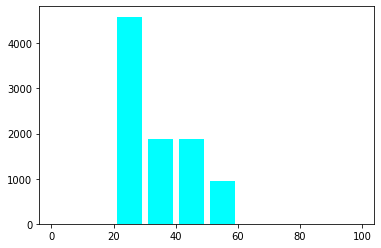

In [59]:
range = (0,100)
plt.hist(male['age'], 10, range, color = 'cyan', histtype = 'bar', rwidth = 0.8)

(array([   0.,    0., 2922.,  764.,  814.,  329.,    0.,    0.,    0.,
           0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

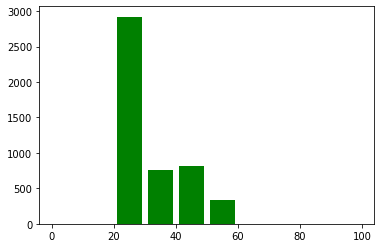

In [60]:
range = (0,100)
plt.hist(female['age'], 10, range, color = 'green', histtype = 'bar', rwidth = 0.8)

#### We can see that the Female belonging to age group in their 20-30s are MORE in number compared to females aged 50-60. 

#### Whereas For males , aged between 50-60 is higher in number when compared to Females. 

Our data looks good now, coming to the first table - we will now check how can we merge all these tables together for our own efficiency. 

Department table has Department ID which is similar to our column in our new dataframe . We can Merge these two in order to get everything in one place.

In [61]:
df1 = df1.rename(columns={"dept_id": "department"})

In [65]:
employeedata = pd.merge(emp_data,df1,on='department',how='inner')

In [66]:
employeedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13203 entries, 0 to 13202
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   avg_monthly_hrs  13203 non-null  float64
 1   department       13203 non-null  object 
 2   last_evaluation  11804 non-null  float64
 3   n_projects       13203 non-null  int64  
 4   salary           13203 non-null  object 
 5   satisfaction     13053 non-null  float64
 6   status           13203 non-null  int64  
 7   tenure           13053 non-null  float64
 8   employee_id      13203 non-null  int64  
 9   age              13203 non-null  int64  
 10  gender           13203 non-null  object 
 11  marital_status   13203 non-null  object 
 12  dept_name        13203 non-null  object 
 13  dept_head        13203 non-null  object 
dtypes: float64(4), int64(4), object(6)
memory usage: 1.5+ MB


In [67]:
employeedata.shape

(13203, 14)

In [68]:
employeedata.describe()

,avg_monthly_hrs,last_evaluation,n_projects,satisfaction,status,tenure,employee_id,age
count,13203.000000,11804.000000,13203.000000,13053.000000,13203.000000,13053.000000,13203.000000,13203.000000
mean,200.019844,0.718416,3.782625,0.622171,0.764296,3.507699,112114.612588,32.929864
std,50.906367,0.172946,1.250969,0.250558,0.424454,1.476926,8504.734621,9.971916
min,49.000000,0.317279,1.000000,0.040058,0.000000,2.000000,100101.000000,22.000000
25%,155.000000,0.564284,3.000000,0.451098,1.000000,3.000000,105769.500000,24.000000
50%,199.000000,0.723653,4.000000,0.654502,1.000000,3.000000,111289.000000,29.000000
75%,245.000000,0.871370,5.000000,0.825615,1.000000,4.000000,116645.500000,41.000000
max,310.000000,1.000000,7.000000,1.000000,1.000000,10.000000,148988.000000,57.000000


In [70]:
employeedata.isnull().sum()

avg_monthly_hrs       0
department            0
last_evaluation    1399
n_projects            0
salary                0
satisfaction        150
status                0
tenure              150
employee_id           0
age                   0
gender                0
marital_status        0
dept_name             0
dept_head             0
dtype: int64

Here, Satisfaction and Tenure ( total number of years ) have almost equal number of missing values . 

In [71]:
avg = employeedata['satisfaction'].mean()

In [73]:
employeedata['satisfaction'] = employeedata['satisfaction'].fillna(avg)  #filling in the missing values with the mean calculated

In [74]:
employeedata.isnull().sum()

avg_monthly_hrs       0
department            0
last_evaluation    1399
n_projects            0
salary                0
satisfaction          0
status                0
tenure              150
employee_id           0
age                   0
gender                0
marital_status        0
dept_name             0
dept_head             0
dtype: int64

In [75]:
employeedata['tenure'].fillna((employeedata['tenure'].mean()), inplace=True)

In [76]:
employeedata.isnull().sum()

avg_monthly_hrs       0
department            0
last_evaluation    1399
n_projects            0
salary                0
satisfaction          0
status                0
tenure                0
employee_id           0
age                   0
gender                0
marital_status        0
dept_name             0
dept_head             0
dtype: int64

#### We have filled in the missing values now. After further discussion with team will decide if we need to keep the Last_evaluation column or Drop it. 